<a href="https://colab.research.google.com/github/Samgoles/Covid-19-Paper-Rec-Engine./blob/main/EDA_TopicModeling_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

######## ING



#####
#####
####
# Data Cleaning and EDA
## Data importing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DF=pd.read_csv('/content/drive/MyDrive/BfinalLHL/DF_final.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
Bclean2

,Unnamed: 0,0
0,0,retrospective chart review describe epidemiolo...
1,1,inflammatory disease respiratory tract associa...
2,2,surfactant protein participate innate response...
3,3,amino acid peptide diverse biological activity...
4,4,respiratory syncytial virus RSV pneumonia viru...
...,...,...
125896,125896,motivation affect pandemic respiratory virus c...
125897,125897,background rate smoking mental illness SMI tim...
125898,125898,recent advance development discovery pharmacol...
125899,125899,study sensitive electrochemical label free DNA...


In [ ]:
!pip install txtai
from txtai.pipeline import Tokenizer

from nltk.corpus import stopwords
from wordcloud import WordCloud

     |████████████████████████████████| 127 kB 8.7 MB/s 
     |████████████████████████████████| 596 kB 47.1 MB/s 
     |████████████████████████████████| 6.5 MB 45.3 MB/s 
     |████████████████████████████████| 3.8 MB 36.9 MB/s 
     |████████████████████████████████| 8.6 MB 31.7 MB/s 
     |████████████████████████████████| 895 kB 49.7 MB/s 
     |████████████████████████████████| 67 kB 4.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
# Tokenizes text and removes stopwords
def tokenize(text, case_sensitive=False):
    import string

    #punctuations = set(string.punctuation)
    stopwords = set(STOP_WORDS)
    custom_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 
    'al.', 'elsevier', 'pmc', 'czi','abstract','background'
      ]

    for w in custom_stop_words:
      stopwords.add(w)
    # Get list of accepted tokens
    tokens = [token for token in Tokenizer.tokenize(text) if token not in stopwords]
    
    if case_sensitive:
        # Filter original tokens to preserve token casing
        return [token for token in text.split() if token.lower() in tokens]

    return tokens


In [ ]:
from wordcloud import WordCloud
freqs = pd.Series(np.concatenate([tokenize(x,True) for x in DF.title])).value_counts()


In [ ]:
# Word Cloud colors
def wcolors(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    colors = ["#7e57c2", "#03a9f4", "#011ffd", "#ff9800", "#ff2079"]
    return np.random.choice(colors)

# Word Cloud visualization
def wordcloud(df, title = None):
    # Set random seed to have reproducible results
    np.random.seed(64)
    
    wc = WordCloud(
        background_color="white",
        max_words=200,
        max_font_size=40,
        scale=5,
        random_state=0
    ).generate_from_frequencies(df)

    wc.recolor(color_func=wcolors)
    
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')

    if title:
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wc),
    plt.show()


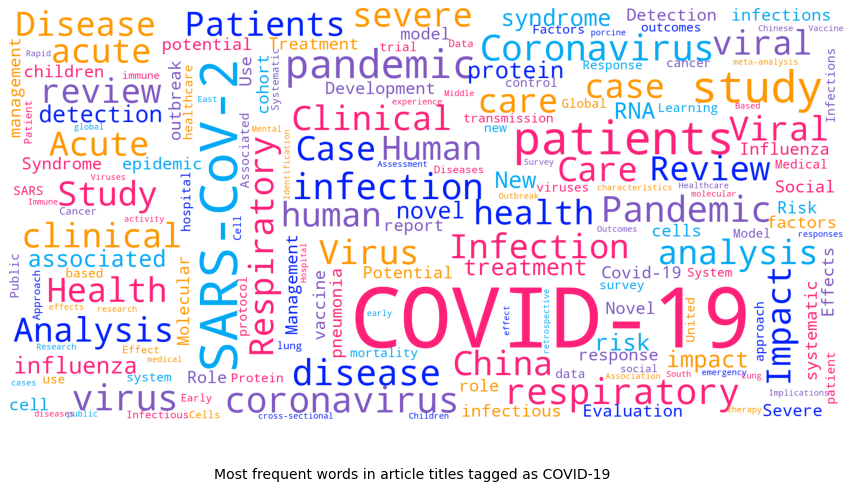

In [ ]:
wordcloud(freqs, "Most frequent words in article titles tagged as COVID-19")

In [ ]:
root_path = '/content/drive/MyDrive/BfinalLHL'
metadata_path = f'{root_path}/metadata.csv'
df = pd.read_csv(metadata_path, dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str, 
    'doi': str
})
df.pdf_to_json.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,5,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


AttributeError: ignored

In [ ]:
import os
# Workaround for mdv terminal width issue
os.environ["COLUMNS"] = "80"

from paperai.highlights import Highlights
from txtai.pipeline import Tokenizer

from nltk.corpus import stopwords
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import pycountry

# Use paperai + NLTK stop words
STOPWORDS = Highlights.STOP_WORDS | set(stopwords.words("english"))

# Tokenizes text and removes stopwords
def tokenize(text, case_sensitive=False):
    # Get list of accepted tokens
    tokens = [token for token in Tokenizer.tokenize(text) if token not in STOPWORDS]
    
    if case_sensitive:
        # Filter original tokens to preserve token casing
        return [token for token in text.split() if token.lower() in tokens]

    return tokens
    
# Country data
countries = [c.name for c in pycountry.countries]
countries = countries + ["USA"]

# Lookup country name for alpha code. If already an alpha code, return value
def countryname(x):
    country = pycountry.countries.get(alpha_3=x)
    return country.name if country else x
    
# Resolve alpha code for country name
def countrycode(x):
    return pycountry.countries.get(name=x).alpha_3

# Tokenize and filter only country names
def countrynames(x):
    return [countryname(country) for country in countries if country.lower() in x.lower()]

# Word Cloud colors
def wcolors(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    colors = ["#7e57c2", "#03a9f4", "#011ffd", "#ff9800", "#ff2079"]
    return np.random.choice(colors)

# Word Cloud visualization
def wordcloud(df, title = None):
    # Set random seed to have reproducible results
    np.random.seed(64)
    
    wc = WordCloud(
        background_color="white",
        max_words=200,
        max_font_size=40,
        scale=5,
        random_state=0
    ).generate_from_frequencies(df)

    wc.recolor(color_func=wcolors)
    
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')

    if title:
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wc),
    plt.show()

# Dataframe plot
def plot(df, title, kind="bar", color="bbddf5"):
    # Remove top and right border
    ax = plt.axes()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Set axis color
    ax.spines['left'].set_color("#bdbdbd")
    ax.spines['bottom'].set_color("#bdbdbd")

    df.plot(ax=ax, title=title, kind=kind, color=color);

# Pie plot
def pie(labels, sizes, title):
    patches, texts = plt.pie(sizes, colors=["#4caf50", "#ff9800", "#03a9f4", "#011ffd", "#ff2079", "#7e57c2", "#fdd835"], startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.tight_layout()
    plt.title(title)
    plt.show()
    
# Map visualization
def mapplot(df, title, bartitle):
    fig = go.Figure(data=go.Choropleth(
        locations = df["Code"],
        z = df["Count"],
        text = df["Country"],
        colorscale = [(0,"#fffde7"), (1,"#f57f17")],
        showscale = False,
        marker_line_color="darkgray",
        marker_line_width=0.5,
        colorbar_title = bartitle,
    ))

    fig.update_layout(
        title={
            'text': title,
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        )
    )
    
    fig.show(config={"displayModeBar": False, "scrollZoom": False})

ModuleNotFoundError: ignored

In [ ]:

nlp = spacy.load("en_core_web_sm")
def st(documents):
  normalized_documents=[]
  for text in documents:
    text=text.lower.strip()
    doc = nlp(text)
    clean_text=[]
    for token in doc:
      #b=token.copy()
      if (token.is_alpha and token not in stopwords and token.is_stop == False ):# Check if it's not a stopword
        lemma = token.lemma_ # Take the lemma of the word
        clean_text.append(lemma)
    clean_text = ' '.join(clean_text)
    normalized_documents.append(clean_text)
  normalized_documents = np.array(normalized_documents)
  return normalized_documents


In [ ]:
Xclean1=st(X.iloc[1:3,0])

AttributeError: ignored

In [ ]:
X=pd.DataFrame(Bclean2['0'])

In [ ]:
X.iloc[1:3,0]

1    inflammatory disease respiratory tract associa...
2    surfactant protein participate innate response...
Name: 0, dtype: object

In [ ]:
DF['cleanabs']=Bclean2['0']

In [ ]:
DF

,Unnamed: 0,Unnamed: 0.1,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,...,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,language,pub_year,month,y-m,cleanabs
0,0,0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,...,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN,en,2001,7,2001-7,retrospective chart review describe epidemiolo...
1,1,1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,...,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,en,2000,8,2000-8,inflammatory disease respiratory tract associa...
2,2,2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,...,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,en,2000,8,2000-8,surfactant protein participate innate response...
3,3,3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,...,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,en,2001,2,2001-2,amino acid peptide diverse biological activity...
4,4,4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,...,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,en,2001,5,2001-5,respiratory syncytial virus RSV pneumonia viru...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125896,125896,599603,4x5t4c5u,ee024840b40e3086ed1d6feb1134fd7d762edc00,Elsevier; Medline; PMC,COVID-19 paraclinical diagnostic tools: Update...,10.1016/j.retram.2020.06.001,PMC7305905,32576508.0,no-cc,...,NaN,document_parses/pdf_json/ee024840b40e3086ed1d6...,document_parses/pmc_json/PMC7305905.xml.json,https://doi.org/10.1016/j.retram.2020.06.001; ...,219946477.0,en,2020,6,2020-6,motivation affect pandemic respiratory virus c...
125897,125897,599605,euc1a763,c6c5790f2536fd294e8d472c19b1a0b4d89bf223,Medline; PMC,Chronic care treatment for smoking cessation i...,10.1186/s12888-021-03113-5,PMC7886429,33593332.0,cc-by,...,NaN,document_parses/pdf_json/c6c5790f2536fd294e8d4...,document_parses/pmc_json/PMC7886429.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/33593332/;...,231939973.0,en,2021,2,2021-2,background rate smoking mental illness SMI tim...
125898,125898,599610,o44dtozb,c07b523c9bf9af72f5b6ee8b586b13ef619bb3ca,Medline; PMC,Pharmacological targets in the ubiquitin syste...,10.1017/s1462399411002031,PMC3219211,22088887.0,cc-by-nc-sa,...,NaN,document_parses/pdf_json/c07b523c9bf9af72f5b6e...,document_parses/pmc_json/PMC3219211.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/22088887/;...,14102550.0,en,2011,11,2011-11,recent advance development discovery pharmacol...
125899,125899,599614,liifn5l5,75e0c6f78c22311296ebb0596e1e8a193e1666d0,Medline; PMC,An electrochemical label-free DNA impedimetric...,10.1007/s11696-020-01280-5,PMC7354876,32836707.0,no-cc,...,NaN,document_parses/pdf_json/75e0c6f78c22311296ebb...,document_parses/pmc_json/PMC7354876.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/32836707/;...,220490899.0,en,2020,7,2020-7,study sensitive electrochemical label free DNA...


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.pipeline import Pipeline

import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
n_features = 500

vectorizer = CountVectorizer(min_df=5, max_df=0.8,ngram_range=(1, 3))#, max_features=n_features)
preprocessor = Pipeline([('vectorizer', vectorizer)])

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn import set_config

set_config(display='diagram')

In [ ]:
DF.cleanabs.isnull().sum()

2

In [ ]:
x=DF[(DF.pub_year>=2020) & ~(DF.cleanabs.isnull())]['cleanabs']
n_topics = 18


lda = LatentDirichletAllocation(n_components=n_topics, 
                                max_iter=5
                                ,
                                learning_method='online',
                                random_state=8,
                                )

pipeline = Pipeline([('preprocessor', preprocessor), 
                     ('model', lda)])
pipeline.fit(x)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('vectorizer',
                                  CountVectorizer(max_df=0.8, min_df=5,
                                                  ngram_range=(1, 3)))])),
                ('model',
                 LatentDirichletAllocation(learning_method='online', max_iter=5,
                                           n_components=18, random_state=8))])

## Explore Topics

In [ ]:
from matplotlib import pyplot as plt
!pip install pyLDAvis
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()

     |████████████████████████████████| 1.7 MB 6.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=f2edeb38834a5a5a36e54bb0c7419a6d262d412b62a24cb25c23b6bfbdfc0a1b
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


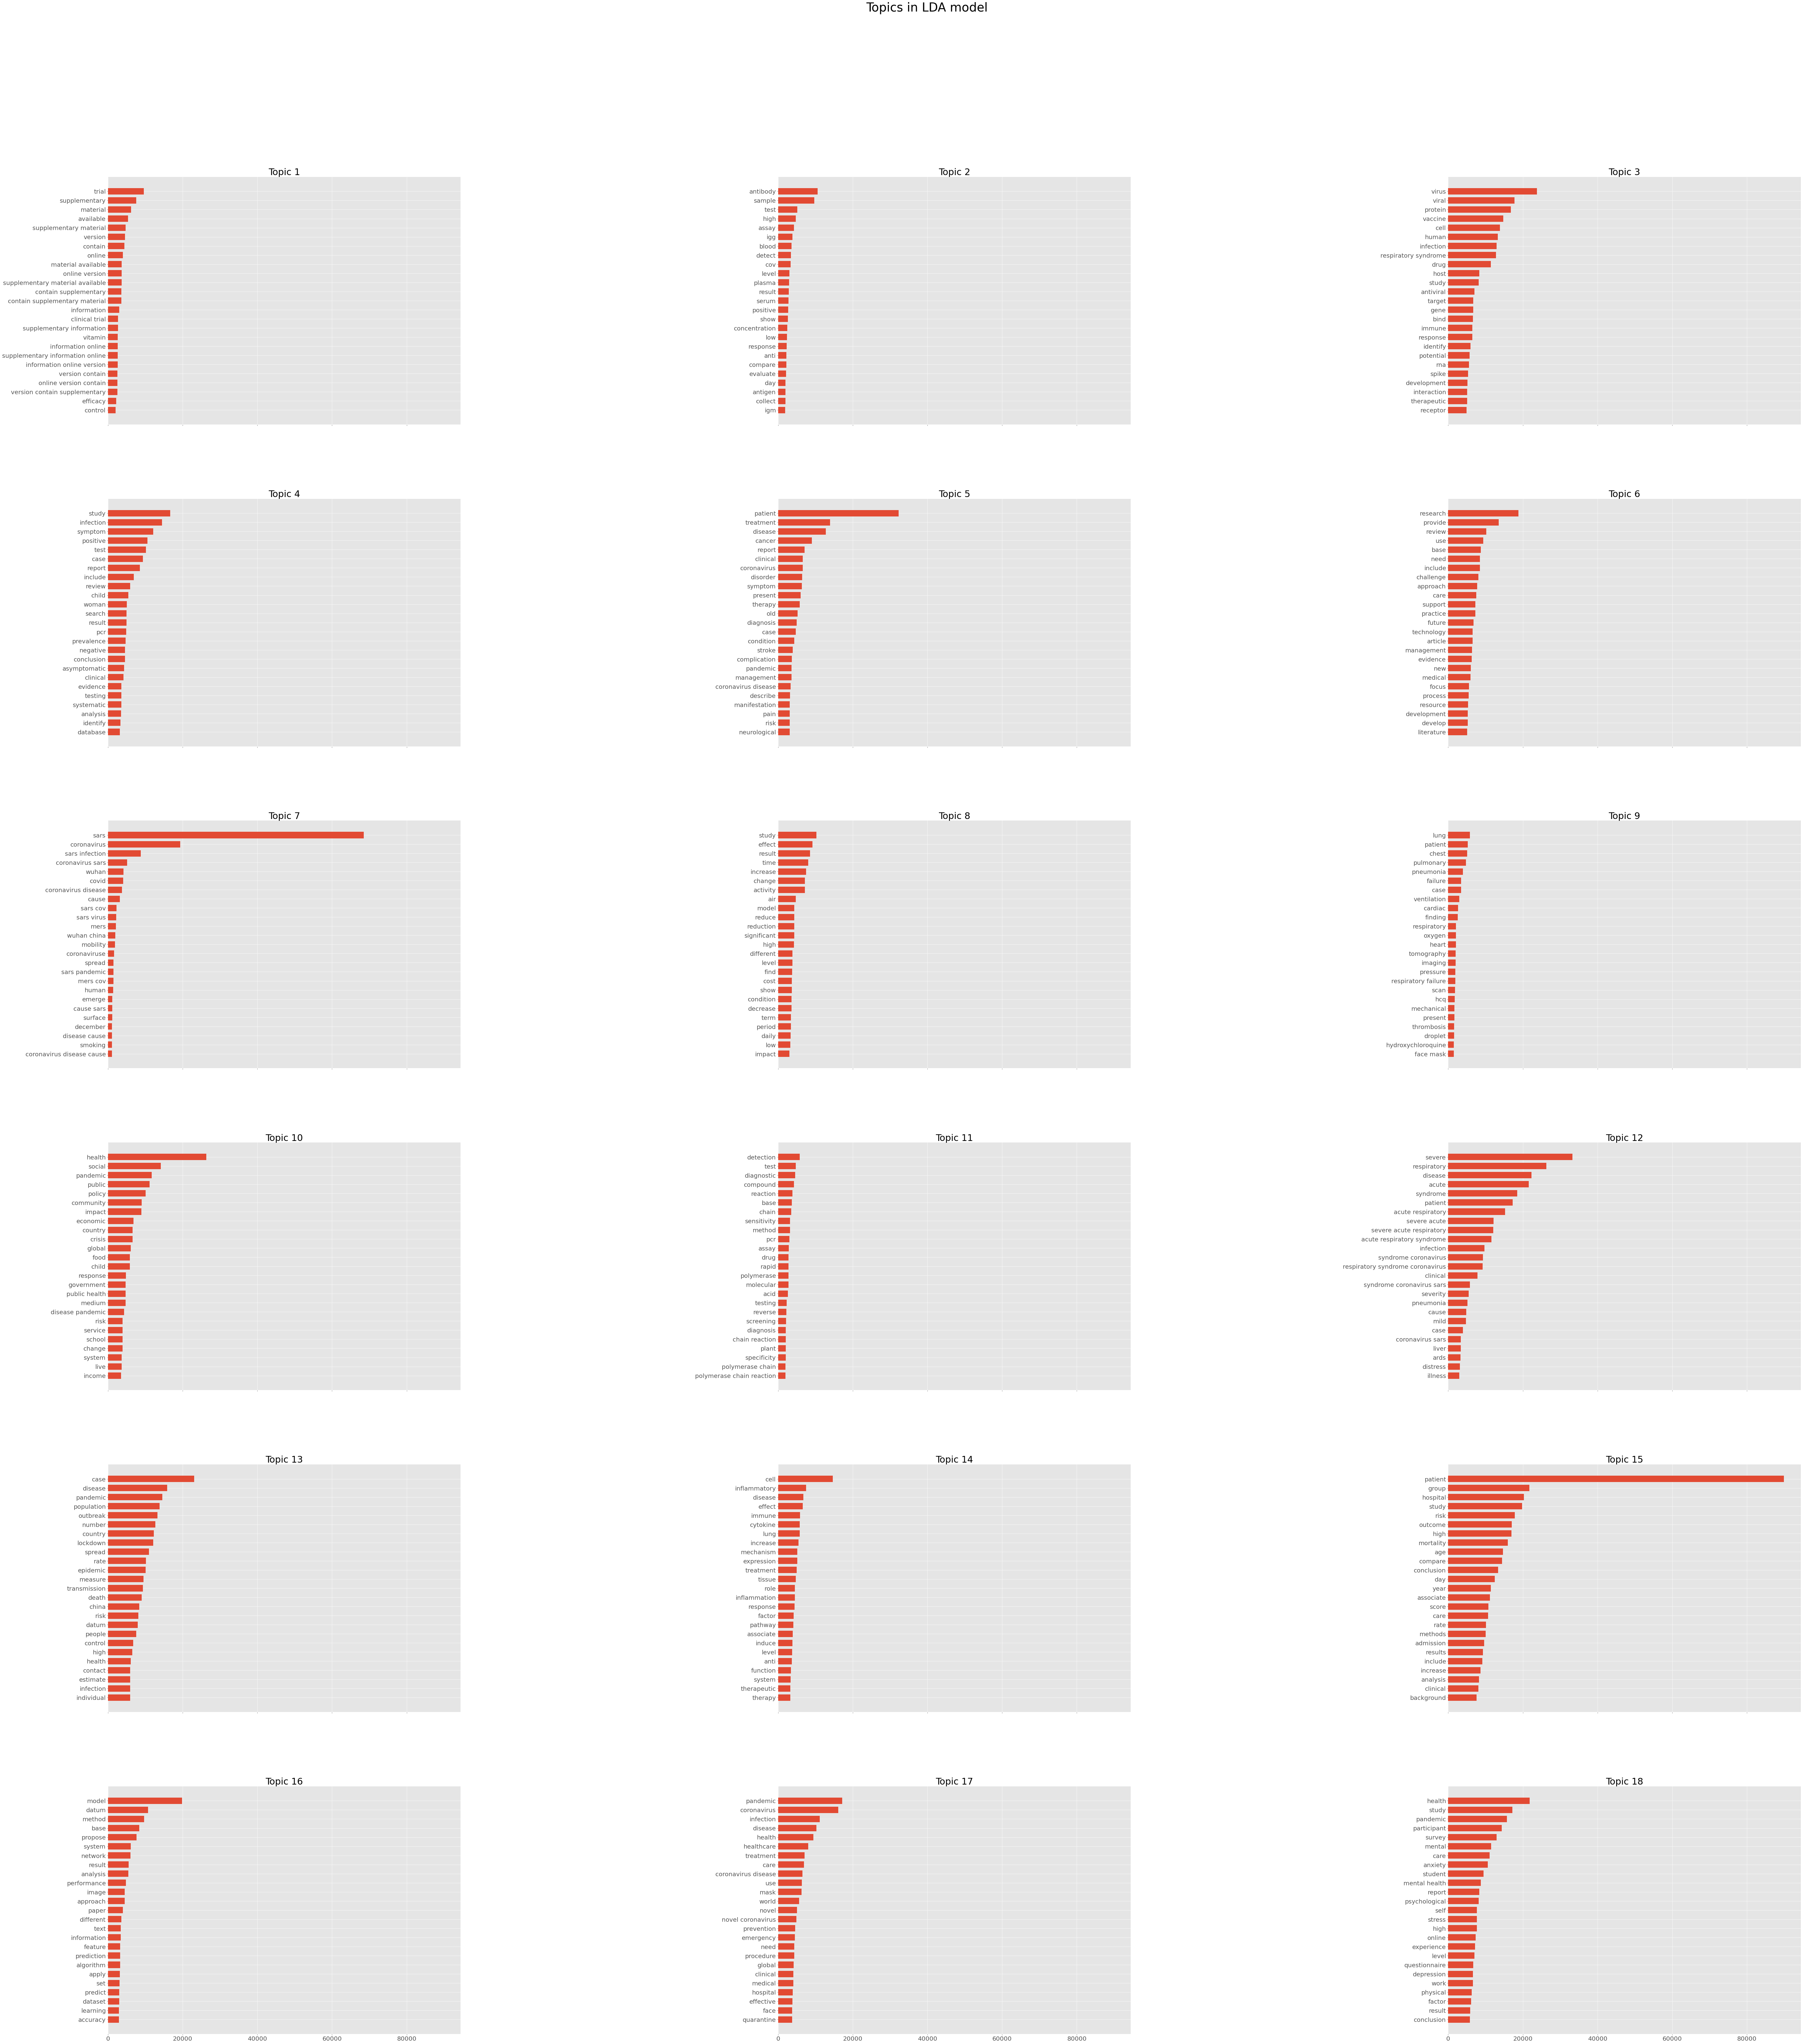

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(6,3, figsize=(100, 100), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    
plot_top_words(lda, vectorizer.get_feature_names(), 25, 'Topics in LDA model')

In [ ]:
data_vectorized = preprocessor.transform(x)
vis = pyLDAvis.sklearn.prepare(lda, data_vectorized, vectorizer, mds='tsne')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

## Title 2 Vec

In [ ]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(data['title'])
    
# Calculating the similarity measures based on Cosine Similarity
sg_title = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [ ]:
x=DF[(DF.pub_year>=2020) & ~(DF.cleanabs.isnull())]['cleanabs']
n_topics = 13


lda = LatentDirichletAllocation(n_components=n_topics, 
                                max_iter=5
                                ,
                                learning_method='online',
                                random_state=8,
                                )

pipeline = Pipeline([('preprocessor', preprocessor), 
                     ('model', lda)])
pipeline.fit(x)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('vectorizer',
                                  CountVectorizer(max_df=0.8, min_df=5,
                                                  ngram_range=(1, 3)))])),
                ('model',
                 LatentDirichletAllocation(learning_method='online', max_iter=5,
                                           n_components=13, random_state=8))])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


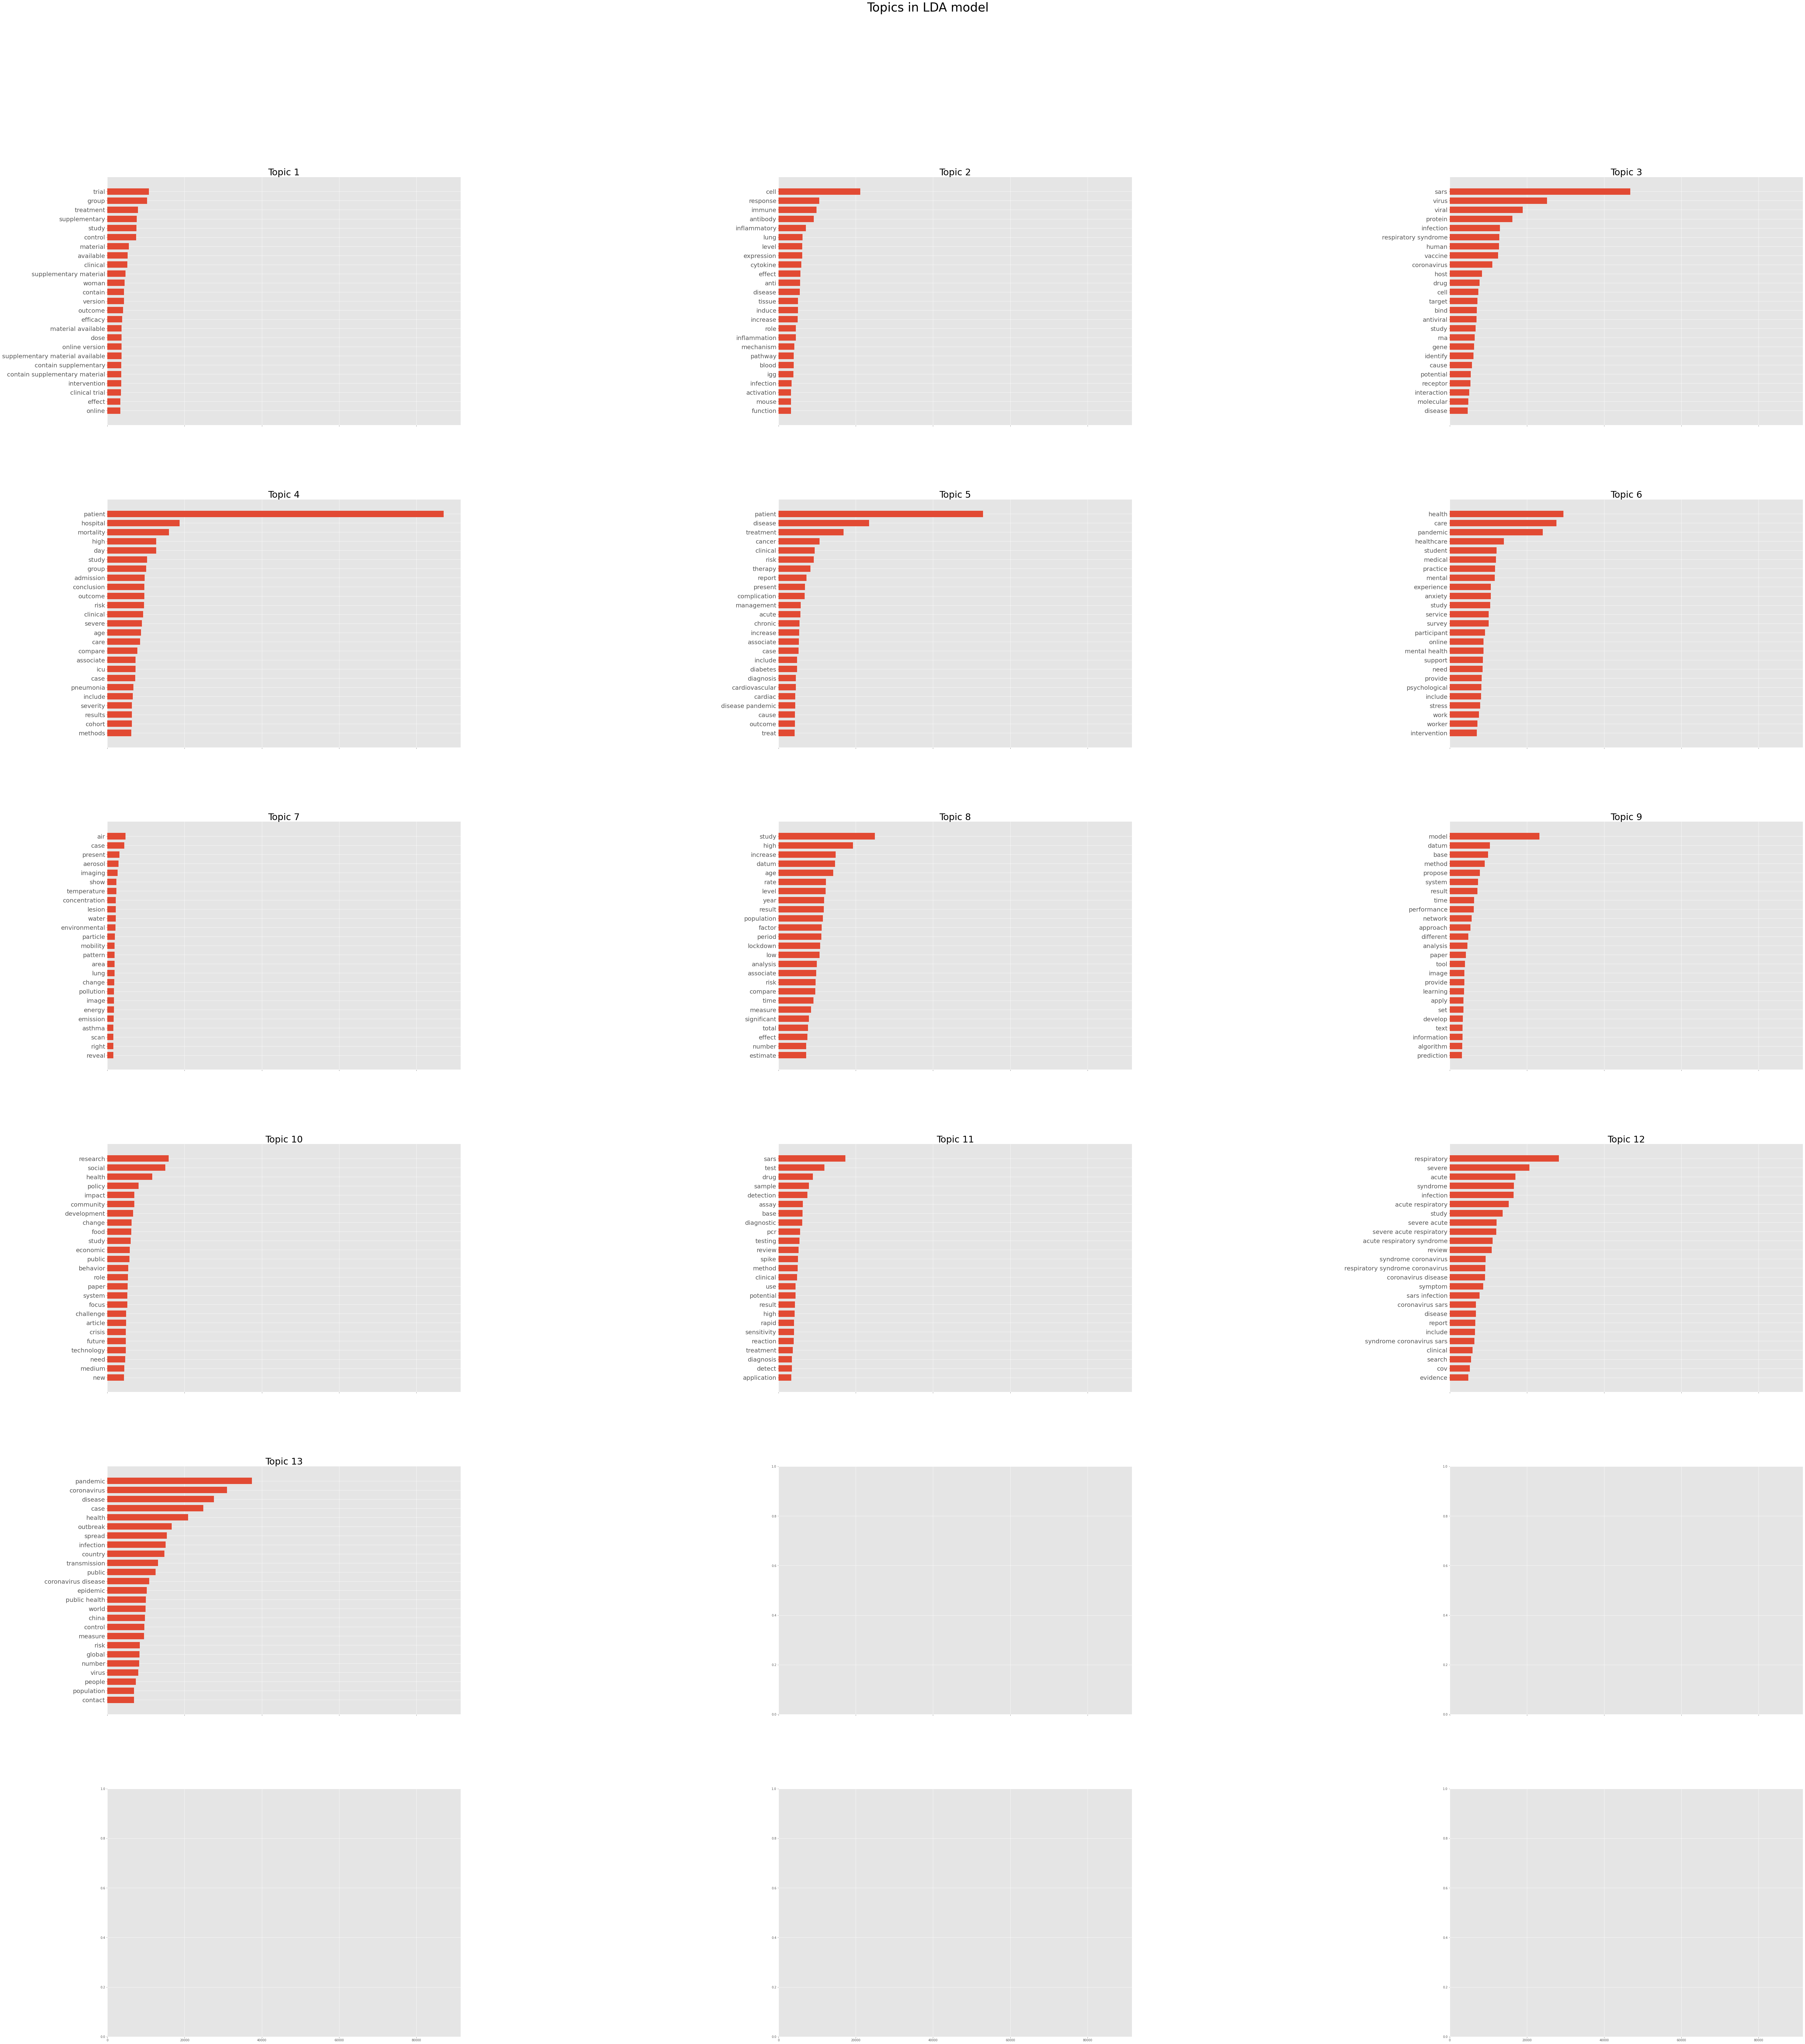

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(6,3, figsize=(100, 100), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    
plot_top_words(lda, vectorizer.get_feature_names(), 25, 'Topics in LDA model')

In [ ]:
x=DF[(DF.pub_year>=2020) & ~(DF.cleanabs.isnull())]['cleanabs']
n_topics = 20


lda = LatentDirichletAllocation(n_components=n_topics, 
                                max_iter=5
                                ,
                                learning_method='online',
                                random_state=8,
                                )

pipeline = Pipeline([('preprocessor', preprocessor), 
                     ('model', lda)])
pipeline.fit(x)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('vectorizer',
                                  CountVectorizer(max_df=0.8, min_df=5,
                                                  ngram_range=(1, 3)))])),
                ('model',
                 LatentDirichletAllocation(learning_method='online', max_iter=5,
                                           n_components=20, random_state=8))])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


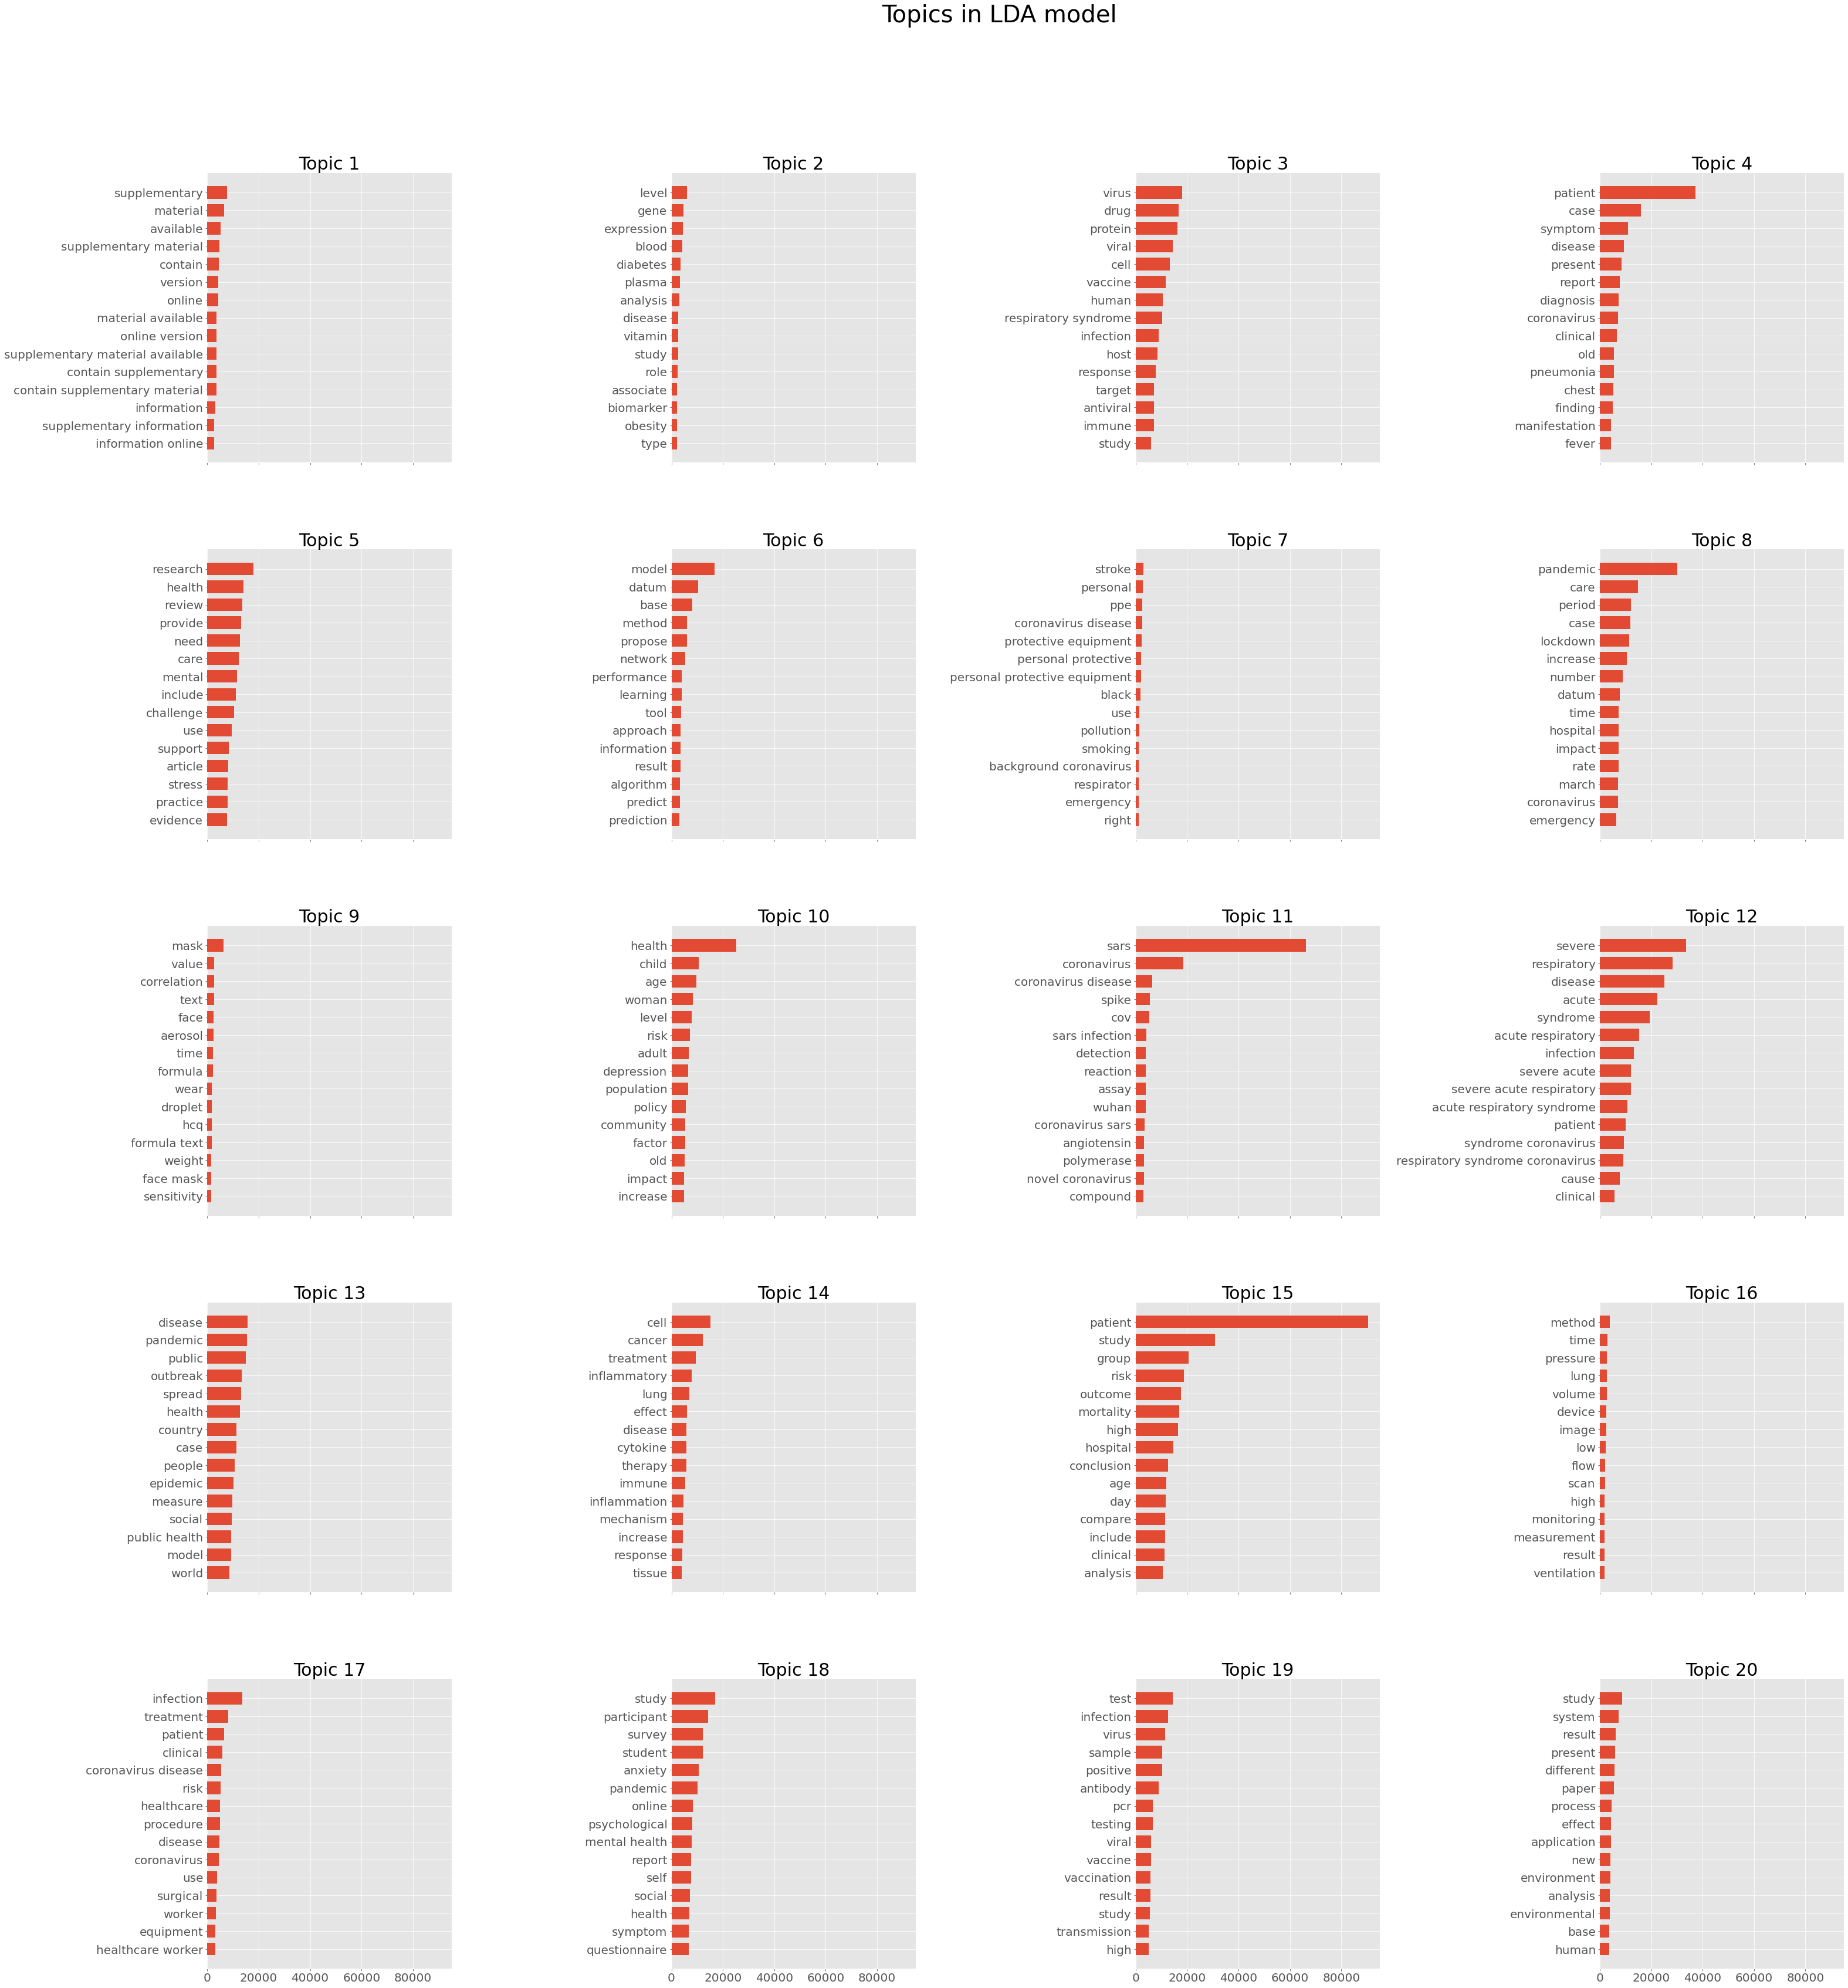

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(5,4, figsize=(50, 50), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    
plot_top_words(lda, vectorizer.get_feature_names(), 15, 'Topics in LDA model')

In [ ]:
import pickle
with open('/content/drive/MyDrive/BfinalLHL/pipeline_LDA20.pickle', 'wb') as f:
    pickle.dump(Pipeline, f)
    

In [ ]:
Df=pd.read_csv('/content/drive/MyDrive/BfinalLHL/DF_final.csv')
import pandas as pd
import zipfile

zf = zipfile.ZipFile('/content/drive/MyDrive/BfinalLHL/Bclean2.zip') 
Bclean0 = pd.read_csv(zf.open('Bclean2.csv'))
Df['clean_abs']=Bclean0['0']
Df.dropna(subset=['clean_abs'],inplace=True).reset_index(drop=True)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
Df=Df.reset_index(drop=True)

In [ ]:
xx.shape

(125899, 20)

In [ ]:
XX=pipeline.transform(Df['clean_abs'])

In [ ]:
xx=pd.DataFrame(XX)

In [ ]:
Df=Df.join(xx)

In [ ]:
Df.to_csv('/content/drive/MyDrive/BfinalLHL/Lda20_XX.csv')

In [ ]:
Df.columns

Index([      'Unnamed: 0',     'Unnamed: 0.1',         'cord_uid',
                    'sha',         'source_x',            'title',
                    'doi',            'pmcid',        'pubmed_id',
                'license',         'abstract',     'publish_time',
                'authors',          'journal',           'mag_id',
       'who_covidence_id',         'arxiv_id',   'pdf_json_files',
         'pmc_json_files',              'url',            's2_id',
               'language',         'pub_year',            'month',
                    'y-m',        'clean_abs',              'LDA',
                        0,                  1,                  2,
                        3,                  4,                  5,
                        6,                  7,                  8,
                        9,                 10,                 11,
                       12,                 13,                 14,
                       15,                 16,                

In [ ]:
from matplotlib import pyplot as plt
!pip install pyLDAvis
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()

In [ ]:
data_vectorized = preprocessor.transform(x)
vis = pyLDAvis.sklearn.prepare(lda, data_vectorized, vectorizer, mds='tsne')
vis

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
14     -10.878068   10.538728       1        1  12.573645
4      -60.884026  -75.591820       2        1  10.126716
2       -2.336119  -53.289074       3        1   7.798974
12     -61.385319  -12.914634       4        1   6.891884
7      -28.737743  126.296997       5        1   6.703003
17       1.066606 -123.552811       6        1   6.512160
19      45.140720   -7.947869       7        1   6.311207
9     -140.795975  -98.530548       8        1   5.198502
11      61.531681  -83.240562       9        1   4.743488
18     -72.563057 -140.396881      10        1   4.724585
3       15.984491   63.578186      11        1   4.647497
13    -160.851624   68.945145      12        1   4.269975
5       85.961830   51.922935      13        1   3.661298
10     -99.020836  109.936348      14        1   3.600357
16    -176.764130   -8.681684      15        1   3.548605
1     -117.189880  -37.420200      16        1   2.415516
15     108.829918  -22.946203      17        1   2.338065
8       47.588097  121.934814      18        1   1.586644
6     -106.467834   30.176889      19        1   1.230828
0      -50.613804   59.328842      20        1   1.117051, topic_info=               Term           Freq          Total Category  logprob  loglift
340090         sars   62250.000000   62250.000000  Default  30.0000  30.0000
267153      patient  138793.000000  138793.000000  Default  29.0000  29.0000
351537       severe   30509.000000   30509.000000  Default  28.0000  28.0000
160766       health   61894.000000   61894.000000  Default  27.0000  27.0000
189003    infection   51030.000000   51030.000000  Default  26.0000  26.0000
...             ...            ...            ...      ...      ...      ...
121253   electronic    1589.223694    3228.655362  Topic20  -4.8547   3.7857
192852  information    2917.639862   16076.419386  Topic20  -4.2472   2.7879
408772         user    1766.365647    4755.101327  Topic20  -4.7490   3.5042
137817          eye    1063.054680    1337.480311  Topic20  -5.2568   4.2648
24550       article    1463.078423   10836.559141  Topic20  -4.9374   2.4921

[1409 rows x 6 columns], token_table=        Topic      Freq       Term
term                              
62          1  0.012061  abdominal
62         11  0.986571  abdominal
477         7  0.022451   abnormal
477        11  0.926295   abnormal
477        17  0.050722   abnormal
...       ...       ...        ...
424063      8  0.755352      young
424063     10  0.008631      young
424063     11  0.190111      young
424215      2  0.998748      youth
424435     10  0.998905   zoonotic

[4303 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 5, 3, 13, 8, 18, 20, 10, 12, 19, 4, 14, 6, 11, 17, 2, 16, 9, 7, 1])